# Customer Churn Factors

# Goals:
* identify factors that contribute to customer churn
* use machine learning model to classify customers as churn or not

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import acquire
import prepare

# Acquire

* Accquired data from noether sequal server
* data obtained 1/2/2023
* 7043 rows by 24 columns before cleaning
* Each row represents a customer
* Each column represents a demograhic or service type information


# Prepare
* Removed columns that did not contain useful information
* Checked for nulls in the data and removed them
* Eliminated rows that did have a space as a value in their total_charges column
* Changed total_charges column object to float
* Added dummy variables for categorical variables
* Split data into train, validate and test (approx. 60/25/15), stratifying on 'churn'
* Scaled continuous variable
* Outliers have not been removed for this iteration of the project


# Data Dictionary




| Feature | Definition |
|:--------|:-----------|
|online_security| True or False, states whether or not customer has online_security|
|churn (target)| True or False, if True, this means that the customer cancelled their services|
|monthly_charges| How much money in USD a customer pays per month|
|total_charges| How much money in USD a customer has paid over the course of their contract(s)|
|contract_type| The length of a customer's contract before they can cancel without penalties|

## A Brief look at data

In [3]:
telco = acquire.get_telco_data()
telco = prepare.prep_classification_project_tree(telco) 
telco.head()

,churn,scaled_total,scaled_monthly,online_security_No internet service,online_security_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year
0,No,0.068315,0.552421,0,0,0,0,1,0
1,No,0.062454,0.504421,0,0,0,0,0,0
2,Yes,0.032338,0.622316,0,0,1,0,0,0
3,Yes,0.142531,0.825263,0,0,1,0,0,0
4,Yes,0.030789,0.706526,0,0,1,0,0,0


In [6]:
train, test = train_test_split(telco, test_size=.2, random_state=123, stratify=telco.churn)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.churn)


## A summary of the data

In [7]:
train.describe()

,scaled_total,scaled_monthly,online_security_No internet service,online_security_Yes,internet_service_type_Fiber optic,internet_service_type_None,contract_type_One year,contract_type_Two year
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000
mean,0.266762,0.545727,0.220218,0.292609,0.437389,0.220218,0.207010,0.243078
std,0.263102,0.255114,0.414447,0.455018,0.496127,0.414447,0.405215,0.428997
min,0.002170,0.153684,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.045608,0.292211,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.162905,0.591579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.448324,0.760421,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,0.989591,0.999158,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Explore

## How often does customer churn occur?

Text(0.5, 1.0, 'churn rate')

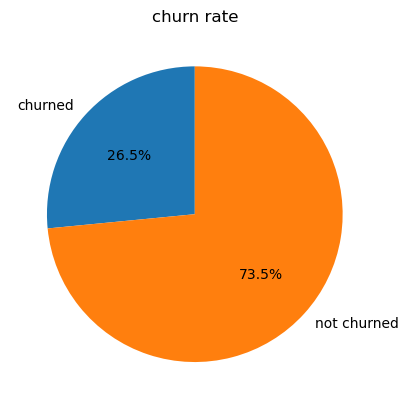

In [9]:
y = np.array([1869, 5174])
mylabels = ['churned', 'not churned']
plt.pie(y, labels = mylabels, startangle=90, autopct='%1.1f%%')
plt.title('churn rate')

* about 1/4 of customers churn

## Do total charges affect churn?